In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
np.random.seed(42)

In [2]:
train_df=pd.read_csv('train.csv')
test_df=pd.read_csv('test.csv')

In [3]:
train_df.shape


(1460, 81)

# Data Inspection

In [4]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
train_df.drop(['Id'],  axis = 1, inplace = True)
train_df.shape

(1460, 80)

In [7]:
train_df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
# Creating dataframe for numeric and categorical features separately 
numerical=train_df.select_dtypes(exclude=['object'])
categorical=train_df.select_dtypes(include=['object'])
numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

<AxesSubplot:>

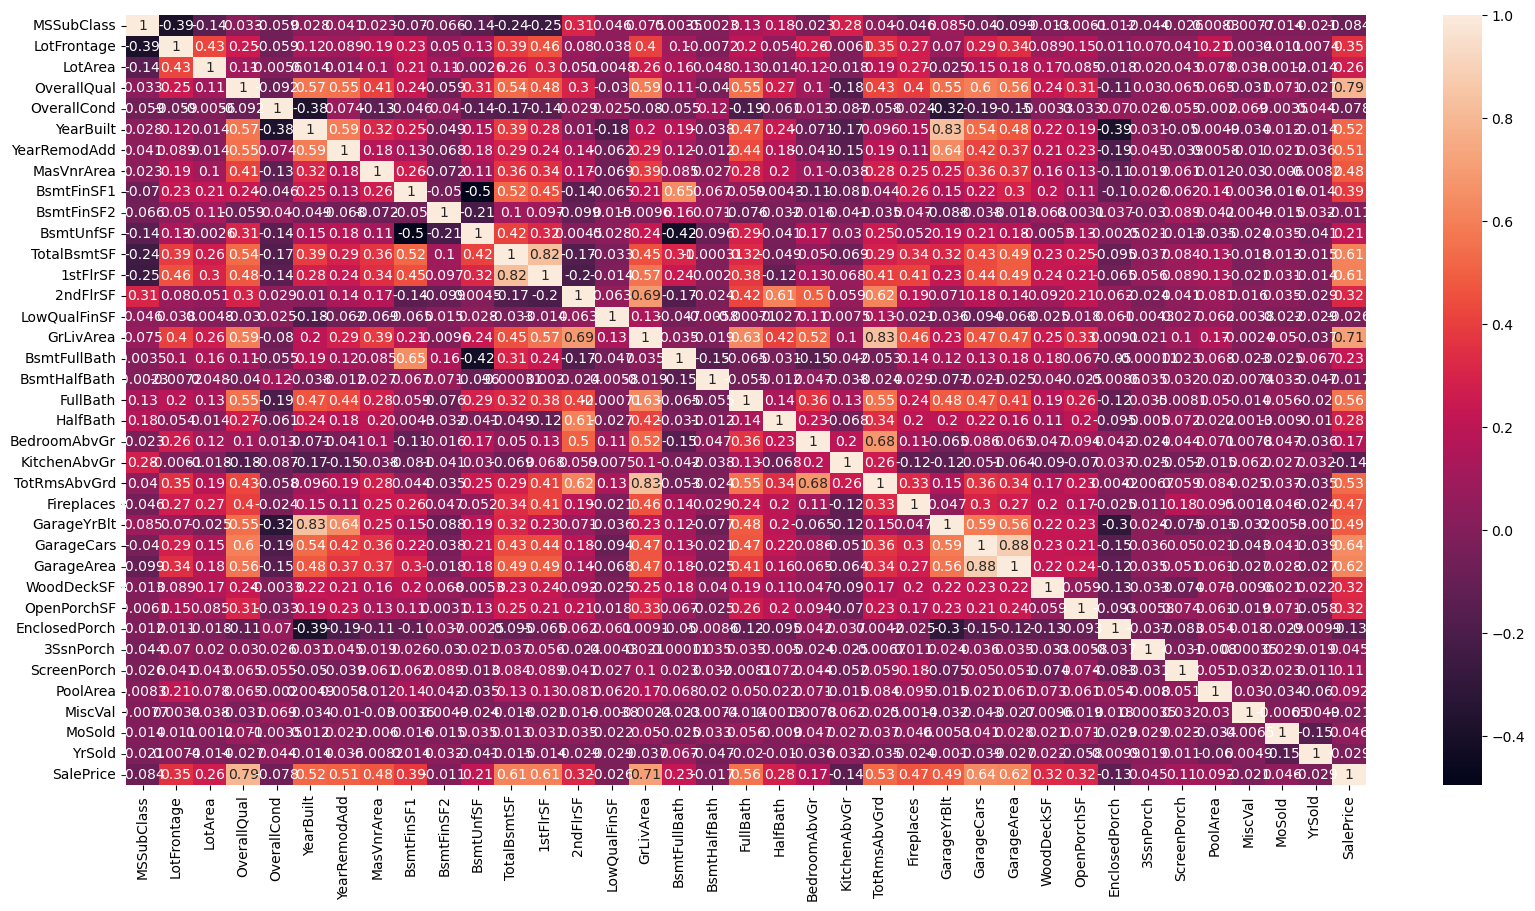

In [9]:
#Correlation Analysis
plt.figure(figsize=(20, 10))
sns.heatmap(numerical.corr(),  annot=True)

Some features have have high correlation with each other(more than 0.6):

GarageYrBlt with YearBuilt 

GarageYrBlt with YearRemodAdd 

1stFlrSF with TotalBsmtSF 

GarageArea with GarageCars

TotRmsAbvGrd with GrLivArea 

1stFlrSF with GrLivArea 

BedroomAbvGr with TotRmsAbvGrd 

TotRmsAbvGrd with 2ndFlrSF


So it is better to drope one feature from each of these.

Also we can see, some columns have a correlation score above 0.5 with SalePrice which is a good indication of using as predictors. Let's see these columns and plot them against SalePrice:

In [10]:
numerical.corr()["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

In [11]:
highest_corr_features=train_df.corr().index[abs(train_df.corr()["SalePrice"])>0.5]
highest_corr_features

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')

In [12]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

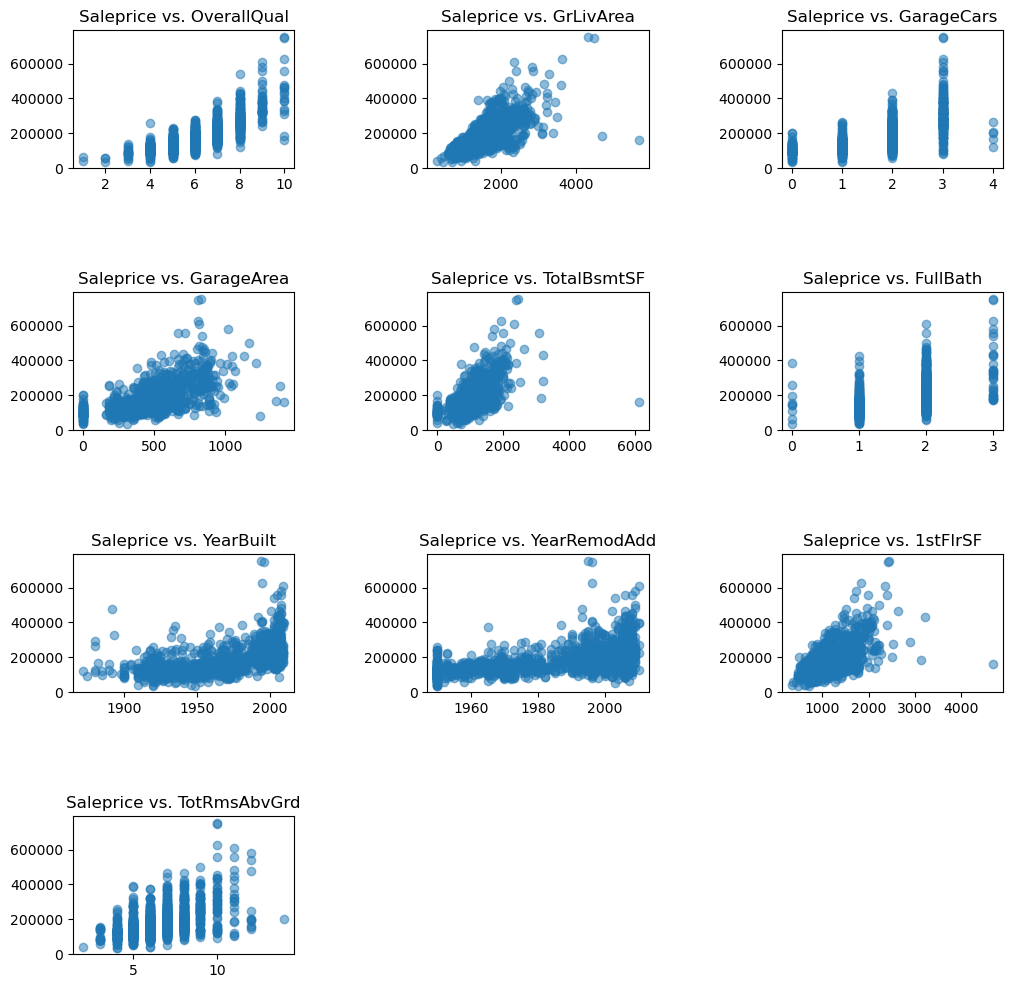

In [13]:
 #Scatter Plot of Saleprice with columns:  OverallQual,  GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd,,TotRmsAbvGrd,1stFlrSF,GarageCars     
var_ind = [16,45,60, 61,37,48,18,19,42,53,]
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.9, wspace = 0.6)
for i in range(1,11):
    a = plot.add_subplot(4,3 , i)
    a.scatter(x = train_df.iloc[: , var_ind[i - 1]], y = train_df.iloc[: , 79], alpha = 0.5)
    a.title.set_text('Saleprice vs. ' + train_df.columns[var_ind[i - 1]])

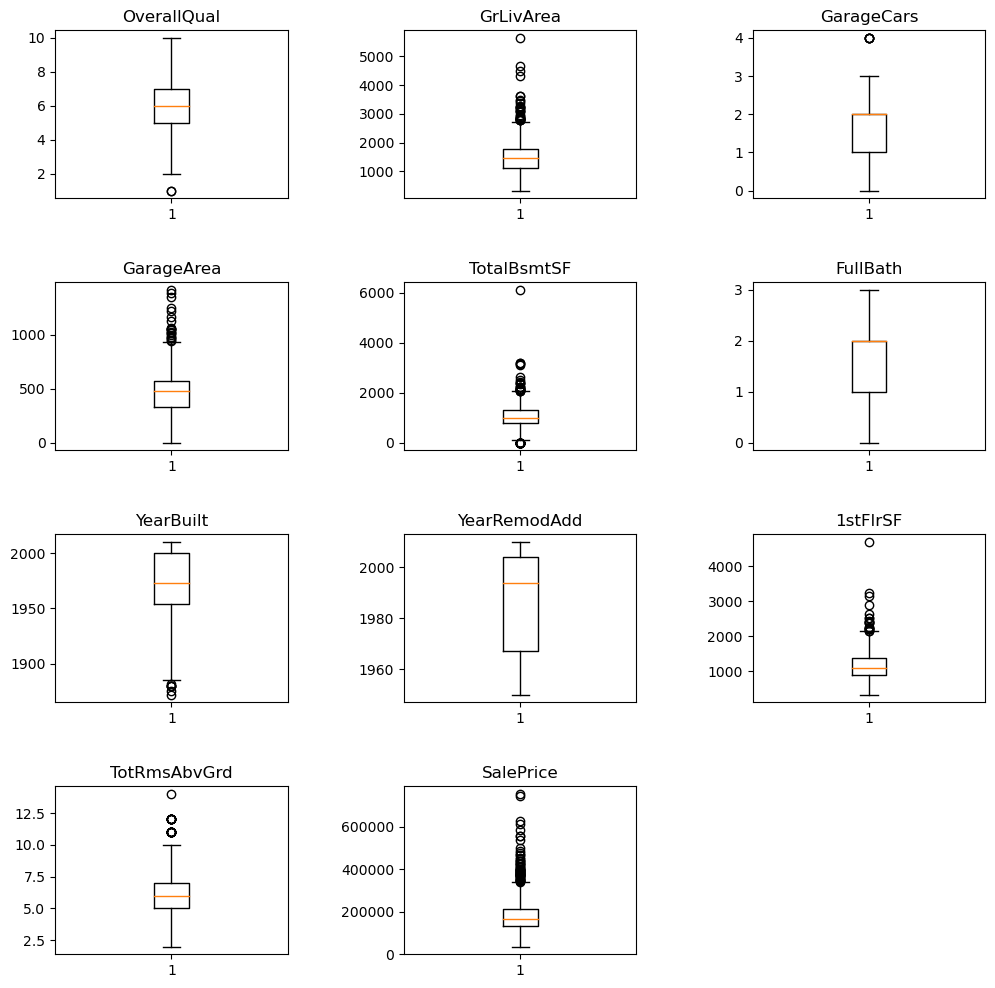

In [14]:
#boxplot of SalePrice, OverallQual,  GrLivArea, GarageArea, TotalBsmtSF, FullBath, YearBuilt, YearRemodAdd,,TotRmsAbvGrd,1stFlrSF,GarageCars 
l = [16,45,60, 61,37,48,18,19,42,53,79]
plot = plt.figure(figsize = (12, 12))
plot.subplots_adjust(hspace = 0.5, wspace = 0.5)
for i in range(1, 12):
    a = plot.add_subplot(4, 3, i)
    a.boxplot(train_df.iloc[: , l[i - 1]])
    a.title.set_text(train_df.columns[l [i - 1]])

As we can see there are some outiers in these features.

# Drop Outliers

In [15]:
#Let's see the outliers percentage in above column
for k, v in  train_df.iloc[: , l].items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        irq = q3 - q1
        v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(train_df.iloc[: , l])[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column OverallQual outliers = 1.58%
Column GrLivArea outliers = 2.12%
Column GarageCars outliers = 0.34%
Column GarageArea outliers = 1.44%
Column TotalBsmtSF outliers = 4.18%
Column FullBath outliers = 0.00%
Column YearBuilt outliers = 0.62%
Column YearRemodAdd outliers = 0.00%
Column 1stFlrSF outliers = 1.37%
Column TotRmsAbvGrd outliers = 5.34%
Column SalePrice outliers = 4.18%


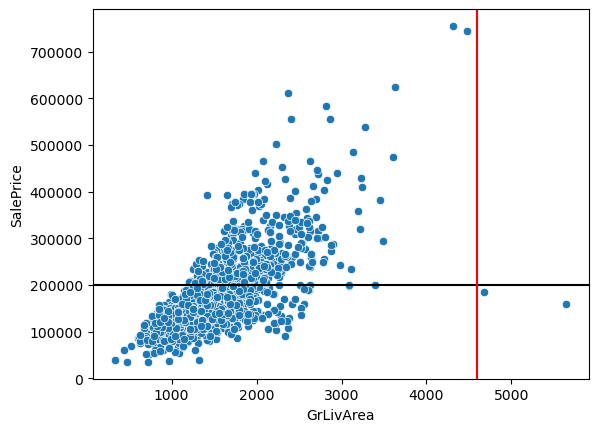

In [16]:
#outlier between saleprice and GrLivArea
sns.scatterplot(data=train_df , x='GrLivArea',y='SalePrice')
plt.axhline(y=200000, color='black')
plt.axvline(x=4600, color='red')


In [17]:
data1 = train_df[~((train_df['GrLivArea']>4500)&(train_df['SalePrice']<200000))]
print(np.shape(data1))

(1458, 80)


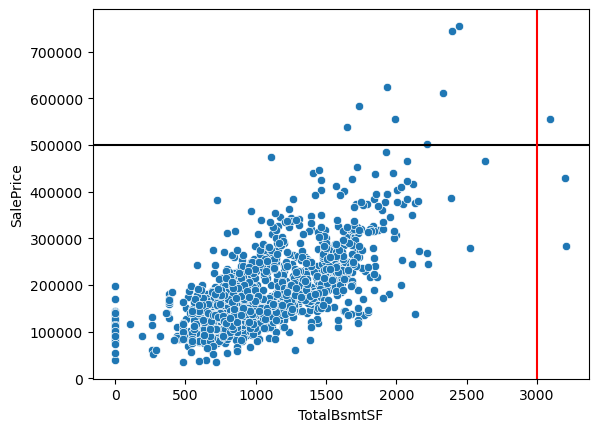

In [18]:
#outlier between saleprice and TotalBsmtSF
sns.scatterplot(data=data1 , x='TotalBsmtSF',y='SalePrice')
plt.axhline(y=500000, color='black')
plt.axvline(x=3000, color='red')

In [19]:
data1 = data1[~((data1['TotalBsmtSF']>3000)&(data1['SalePrice']<=500000))]
print(np.shape(data1))

(1456, 80)


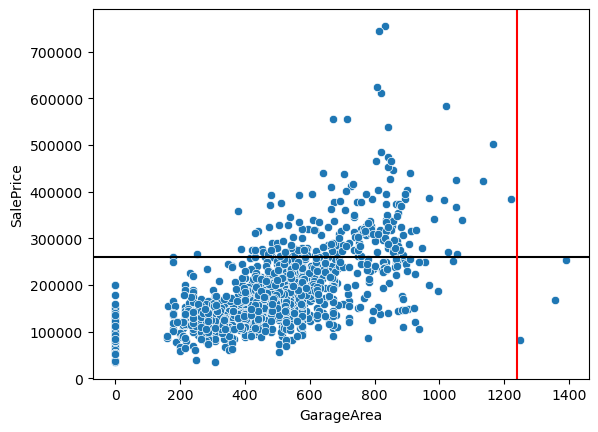

In [20]:
#outlier between saleprice and GarageArea
sns.scatterplot(data=data1 , x='GarageArea',y='SalePrice')
plt.axhline(y=260000, color='black')
plt.axvline(x=1240, color='red')

In [21]:
data1 = data1[~((data1['GarageArea']>1240)&(data1['SalePrice']<260000))]
print(np.shape(data1))

(1453, 80)


# Featues selections and Looking for Missing Data

In [22]:
data1.isna().sum().sort_values(ascending=False)

PoolQC         1447
MiscFeature    1400
Alley          1362
Fence          1172
FireplaceQu     689
               ... 
Heating           0
HeatingQC         0
MSZoning          0
1stFlrSF          0
SalePrice         0
Length: 80, dtype: int64

In [23]:
# Percentage of Null values
null_values=[(i,data1[i].isna().mean()*100) for i in data1]
null_df=pd.DataFrame(null_values,columns=['column_name','percentage'])
null_df


,column_name,percentage
0,MSSubClass,0.000000
1,MSZoning,0.000000
2,LotFrontage,17.687543
3,LotArea,0.000000
4,Street,0.000000
...,...,...
75,MoSold,0.000000
76,YrSold,0.000000
77,SaleType,0.000000
78,SaleCondition,0.000000


In [24]:
null_df[null_df['percentage']>40].sort_values('percentage')

,column_name,percentage
56,FireplaceQu,47.419133
72,Fence,80.660702
5,Alley,93.737096
73,MiscFeature,96.352374
71,PoolQC,99.587061


We drop these features(These features have correlation less than 0.5 and are not important)

In [25]:
data1.drop([ 'Alley', 'FireplaceQu','PoolQC','Fence','MiscFeature'],  axis = 1, inplace = True)
data1.shape

(1453, 75)

In [26]:
#Removing one of the high correlated from pairs checked using heatmap
data1.drop([ '1stFlrSF', 'TotRmsAbvGrd','GarageCars','GarageYrBlt'],  axis = 1, inplace = True)
data1.shape

(1453, 71)

In [27]:
numerical1=data1.select_dtypes(exclude=['object'])
categorical1=data1.select_dtypes(include=['object'])
categorical1.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [28]:
for feature in numerical1.columns:
    data1[feature]=data1[feature].fillna(data1[feature].mean())
    


In [29]:
for feature in categorical1.columns:
    data1[feature]=data1[feature].fillna(data1[feature].mode()[0])
    

In [30]:
data1.isna().sum().sort_values(ascending=False)

MSSubClass      0
BsmtHalfBath    0
Functional      0
KitchenQual     0
KitchenAbvGr    0
               ..
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
SalePrice       0
Length: 71, dtype: int64

 # One OnHot Encoding on Categorical Features

In [31]:
data1=pd.get_dummies(data1,drop_first=True)
data1.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,0,1,0,0,0,1,0


In [32]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1453 entries, 0 to 1459
Columns: 228 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(2), int64(31), uint8(195)
memory usage: 662.6 KB


# Building Prediction Model¶

### Model 1: Linear Regression

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge,RidgeCV, LassoCV,Lasso
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [34]:
X =data1.drop('SalePrice', axis = 1)
y= data1['SalePrice']

In [35]:
X_train, X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3,  random_state=42)

In [36]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression()

In [37]:
y_pred_lin=regressor.predict(X_test)
regressor.score(X_train, y_train, sample_weight=None)

0.9472763264178685

In [38]:
abs_err_lin_reg= abs(y_test -y_pred_lin)

In [39]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = pd.DataFrame({'Mean of AbsErrors':    abs_err_lin_reg.mean(),
                           'Median of AbsErrors' : abs_err_lin_reg.median(),
                           'SD of AbsErrors' :     abs_err_lin_reg.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lin_reg),
                           'Min of AbsErrors':     abs_err_lin_reg.min(),
                           'Max of AbsErrors':     abs_err_lin_reg.max()}, index = ['lin_reg'])
model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
lin_reg,17445.817078,11840.143158,20009.362105,16811.3108,38.647655,208080.100773


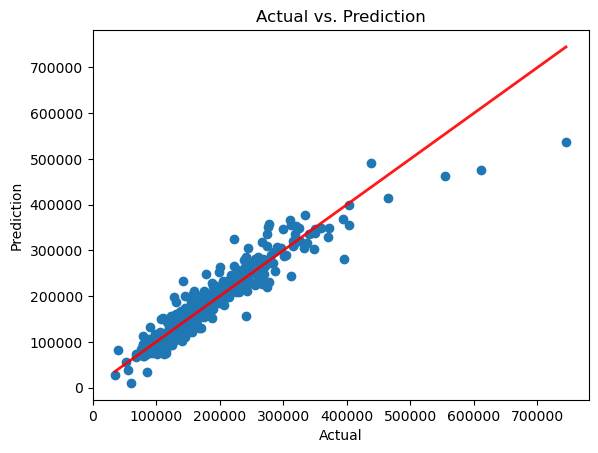

In [40]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = y_pred_lin)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')

# Model 2: Lasso Regression

In [41]:
lambda_grid = 10 ** np.linspace(1, -3, 100)

In [42]:
#K-fold Cross Validation to Choose the Best Model
lassocv = LassoCV(alphas = lambda_grid, cv = 10, normalize = True)
lassocv.fit(X_train, y_train)
lassocv.alpha_

10.0

In [43]:
#Best Model Coefs:
lassocv.coef_


array([-6.41249243e+01,  2.78261337e+01,  5.09295919e-01,  6.67005462e+03,
        6.29055580e+03,  2.92776754e+02,  8.14474071e+01,  3.08159394e+01,
        1.42851563e+01,  2.02367278e+00, -0.00000000e+00,  1.30701716e+01,
        0.00000000e+00, -3.44924021e+01,  6.09972295e+01,  2.44280761e+03,
       -9.75574755e+01,  3.84850137e+03,  0.00000000e+00, -2.32712302e+03,
       -1.74149679e+04,  2.09739806e+03,  2.64919637e+01,  9.27373087e+00,
        2.57586047e+01, -0.00000000e+00,  1.75014603e+01,  1.01363008e+01,
        1.27164143e+01, -0.00000000e+00, -1.40952751e+02,  0.00000000e+00,
        9.70280014e+03,  0.00000000e+00,  4.07974038e+03, -5.53904637e+02,
        3.08032643e+04,  7.51868696e+03,  3.88820160e+03, -0.00000000e+00,
        3.42902400e+03, -7.37905417e+03,  0.00000000e+00,  0.00000000e+00,
        1.13068078e+04, -6.73407342e+03, -2.56507280e+03,  0.00000000e+00,
       -0.00000000e+00, -1.64684669e+04,  0.00000000e+00,  1.69195660e+03,
        8.47359974e+03, -

In [44]:
lassoreg = Lasso(alpha = lassocv.alpha_, normalize = True)
lassoreg.fit(X_train, y_train)
pred_lasso = lassoreg.predict(X_test)


In [45]:
#Absolute error
abs_err_lasso = abs(y_test - pred_lasso)
abs_err_lasso.mean() 

15917.259306436856

In [46]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_lasso.mean(),
                           'Median of AbsErrors' : abs_err_lasso.median(),
                           'SD of AbsErrors' :     abs_err_lasso.std(),
                           'IQR of AbsErrors':     iqr(abs_err_lasso),
                           'Min of AbsErrors':     abs_err_lasso.min(),
                           'Max of AbsErrors':     abs_err_lasso.max()}, index = ['Lasso Reg']),ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
lin_reg,17445.817078,11840.143158,20009.362105,16811.310800,38.647655,208080.100773
Lasso Reg,15917.259306,10828.842286,19599.438043,14201.692051,20.408281,219356.523042


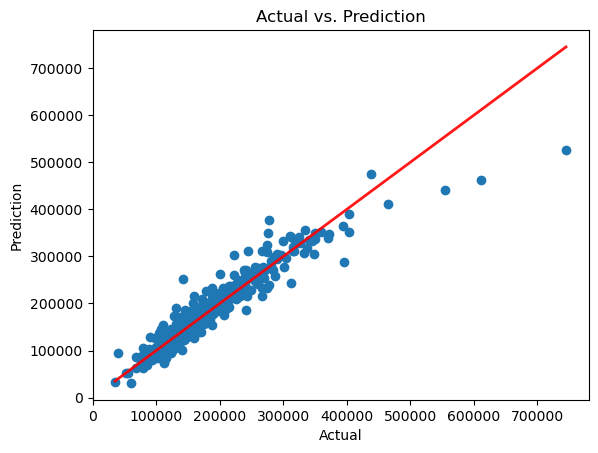

In [47]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_lasso)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, alpha = 0.9, linewidth = 2, color = 'red')

In [48]:
lassoreg.score(X_test, y_test, sample_weight=None)

0.8982303190431966

# Model 3: Ridge Regression

In [49]:
lambda_grid = 10 ** np.linspace(5, -2, 100)

In [50]:
#K-fold Cross Validation to Choose the Best Model
ridgecv = RidgeCV(alphas = lambda_grid, cv = 10, normalize = True)
ridgecv.fit(X_train, y_train)
ridgecv.alpha_

0.05094138014816386

In [51]:
#Best Model Coefs:
#ridgecv.coef_

In [52]:
ridgereg = Ridge(alpha = ridgecv.alpha_, normalize = True)
ridgereg.fit(X_train, y_train)
pred_ridge = ridgereg.predict(X_test)


In [53]:
#Absolute error
abs_err_ridge = abs(y_test - pred_ridge)

In [54]:
#Absolute error mean, median, sd, IQR, max, min
from scipy.stats import iqr
model_comp = model_comp.append(pd.DataFrame({'Mean of AbsErrors':    abs_err_ridge.mean(),
                                             'Median of AbsErrors' : abs_err_ridge.median(),
                                             'SD of AbsErrors' :     abs_err_ridge.std(),
                                             'IQR of AbsErrors':     iqr(abs_err_ridge),
                                             'Min of AbsErrors':     abs_err_ridge.min(),
                                             'Max of AbsErrors':     abs_err_ridge.max()}, index = ['Ridge Reg']), 
                               ignore_index = False)

model_comp

,Mean of AbsErrors,Median of AbsErrors,SD of AbsErrors,IQR of AbsErrors,Min of AbsErrors,Max of AbsErrors
lin_reg,17445.817078,11840.143158,20009.362105,16811.310800,38.647655,208080.100773
Lasso Reg,15917.259306,10828.842286,19599.438043,14201.692051,20.408281,219356.523042
Ridge Reg,16397.255138,10955.538366,20046.257055,15423.766349,70.810857,227626.390236


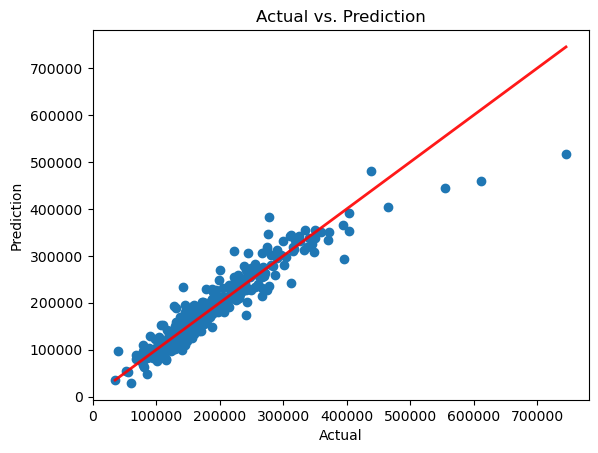

In [55]:
#Actual vs. Prediction
plt.scatter(x = y_test, y = pred_ridge)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs. Prediction')

#Add 45 degree line
xp = np.linspace(y_test.min(), y_test.max(), 100)
plt.plot(xp, xp, 'k', alpha = 0.9, linewidth = 2, color = 'red')